In [172]:
##Chelsea Dejean
##Statistics with Python Assignment


In [173]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
import scipy.stats
from math import sqrt
import seaborn as sns

In [174]:
boston_url = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ST0151EN-SkillsNetwork/labs/boston_housing.csv'
boston_df=pd.read_csv(boston_url)

Median value of owner-occupied homes in $1000s is 21.2


Text(0.5, 1.0, 'Median value of owner-occupied homes')

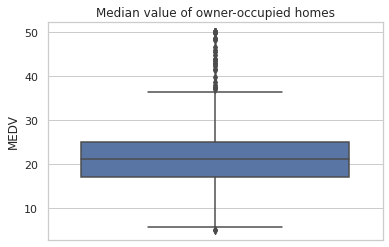

In [175]:
print('Median value of owner-occupied homes in $1000s is', boston_df['MEDV'].median())
ax=sns.boxplot(y='MEDV', data=boston_df)
ax.set_title('Median value of owner-occupied homes')

##I calculated the median of the MEDV.

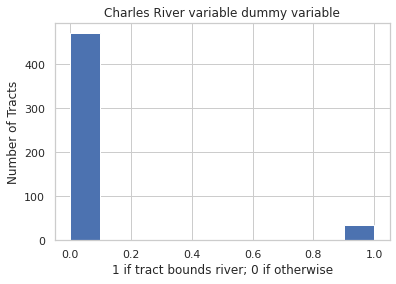

In [176]:
plt.hist(boston_df['CHAS'])
plt.title('Charles River variable dummy variable')
plt.xlabel('1 if tract bounds river; 0 if otherwise')
plt.ylabel('Number of Tracts')
plt.show()

In [177]:
boston_df.loc[(boston_df['AGE']<= 35), 'age_group']= '35 years and younger'
boston_df.loc[(boston_df['AGE']>35)& (boston_df['AGE']<70), 'age_group']= 'between 35 and 70 years'
boston_df.loc[(boston_df['AGE']>70), 'age_group'] = '70 years and older'

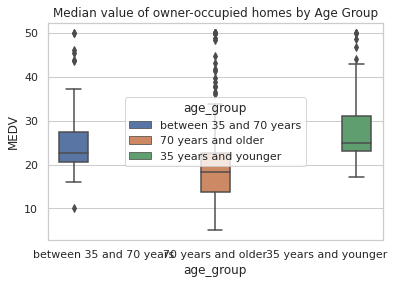

In [178]:
ax= sns.boxplot(x='age_group', hue='age_group', y='MEDV', data=boston_df)
ax= ax.set_title('Median value of owner-occupied homes by Age Group')


Conclusion: There is a positive relationship. The larger the proportion of non-retail business acres per town, the higher the nitric oxide concentrations there is compared to smaller proportions.


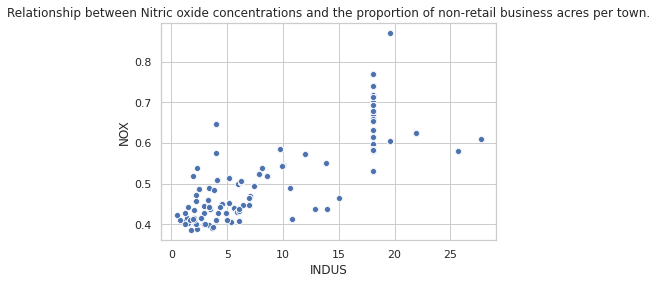

In [179]:
ax= sns.scatterplot(x='INDUS', y='NOX', data=boston_df)
ax= ax.set_title('Relationship between Nitric oxide concentrations and the proportion of non-retail business acres per town.')

print('Conclusion: There is a positive relationship. The larger the proportion of non-retail business acres per town, the higher the nitric oxide concentrations there is compared to smaller proportions.')

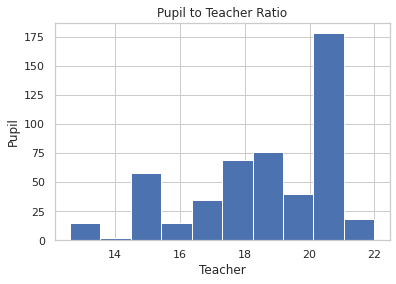

In [180]:
plt.hist(boston_df['PTRATIO'])
plt.xlabel("Teacher")
plt.ylabel("Pupil")
plt.title('Pupil to Teacher Ratio')
plt.show()

In [181]:
##Is there a significant difference in median value of houses bounded by the Charles river or not? (T-test for independent samples)
##H_0: there is no difference in median value of houses bounded by the Charles river
##H_1: there is a difference in median value of houses bounded by the Charles river

scipy.stats.levene(boston_df[boston_df['CHAS']==0]['MEDV'], boston_df[boston_df['CHAS']==1]['MEDV'], center= 'mean')


LeveneResult(statistic=8.75190489604598, pvalue=0.003238119367639829)

In [182]:
scipy.stats.ttest_ind(boston_df[boston_df['CHAS']==0]['MEDV'], boston_df[boston_df['CHAS']==1]['MEDV'], equal_var= True)

Ttest_indResult(statistic=-3.996437466090509, pvalue=7.390623170519905e-05)

In [183]:
print("Is there a significant difference in median value of houses bounded by the Charles river or not?")
print('The Null Hypothesis is that there is no difference in median value of houses bounded by the Charles river.')
print('\n')
print("Conclusion: After calculating the p-value using the T-test, we reject the null hypothesis and accept the alternate hypthesis that there is a difference in the median value of houses bounded by the Charles river.")

Is there a significant difference in median value of houses bounded by the Charles river or not?
The Null Hypothesis is that there is no difference in median value of houses bounded by the Charles river.


Conclusion: After calculating the p-value using the T-test, we reject the null hypothesis and accept the alternate hypthesis that there is a difference in the median value of houses bounded by the Charles river.


In [184]:
##Is there a difference in Median values of houses (MEDV) for each proportion of owner occupied units built prior to 1940 (AGE)? (ANOVA)
##H_0: The means of the MEDV and AGE are equal.
##H_1: The means of MEDV and AGE differ. 

boston_df.loc[(boston_df['AGE']<= 35), 'age_group']= '35 years and younger'
boston_df.loc[(boston_df['AGE']>35)& (boston_df['AGE']<70), 'age_group']= 'between 35 and 70 years'
boston_df.loc[(boston_df['AGE']>70), 'age_group'] = '70 years and older'

scipy.stats.levene(boston_df[boston_df['age_group']== '35 years and younger']['MEDV'],
                  boston_df[boston_df['age_group']== 'between 35 and 70 years']['MEDV'],
                  boston_df[boston_df['age_group']== '70 years and older']['MEDV'], center='mean')

LeveneResult(statistic=2.7806200293748304, pvalue=0.06295337343259205)

In [185]:
## The pvalue is greater than 0.05, the variances are equal. 

thirty_five_lower= boston_df[boston_df['age_group']== '35 years and younger']['MEDV']
thirty_five_seventy= boston_df[boston_df['age_group']== 'between 35 and 70 years']['MEDV']
seventy_older= boston_df[boston_df['age_group']== '70 years and older']['MEDV']

f_statistic, p_value= scipy.stats.f_oneway(thirty_five_lower, thirty_five_seventy, seventy_older)
print("F_Statistic: {0}, P-Value: {1}" .format(f_statistic,p_value))

F_Statistic: 36.40764999196599, P-Value: 1.7105011022702984e-15


In [186]:
print("Is there a difference in Median values of houses (MEDV) for each proportion of owner occupied units built prior to 1940 (AGE)?")
print("The Null Hypothesis is the means of MEDV and AGE are equal.")
print('\n')
print("Conclusion: Since the p-value is less than 0.05, we will reject the Null Hypothesis and accept the alternate that they differ.")

Is there a difference in Median values of houses (MEDV) for each proportion of owner occupied units built prior to 1940 (AGE)?
The Null Hypothesis is the means of MEDV and AGE are equal.


Conclusion: Since the p-value is less than 0.05, we will reject the Null Hypothesis and accept the alternate that they differ.


In [187]:
##Can we conclude that there is no relationship between Nitric oxide concentrations and proportion of non-retail business acres per town?

##H_0: Nitric oxide concentrations are not correlated with the proportion of non-retail business acres per town. 
##H_1: Nitric oxide concentrations are correlated with the proportion of non-retail business acres per town. 

scipy.stats.pearsonr(boston_df['NOX'], boston_df['INDUS'])

(0.7636514469209154, 7.913361061236894e-98)

In [188]:
print('Can we conclude that there is no relationship between Nitric oxide concentrations and proportion of non-retail business acres per town?')
print("The Null Hypothesis is that Nitric oxide concentrations are not correlated with the proportion of non-retail business acres per town.")
print('\n')
print('Conclusion: Using the Pearson Correlation test, the p-value was signifcantly less than 0.05, therefore we reject the Null hypothesis and accept the alternate hypthesis that there is a correlation/relationship between the Nitric oxide concentrations and proportion of non-retail business acres per town.')

Can we conclude that there is no relationship between Nitric oxide concentrations and proportion of non-retail business acres per town?
The Null Hypothesis is that Nitric oxide concentrations are not correlated with the proportion of non-retail business acres per town.


Conclusion: Using the Pearson Correlation test, the p-value was signifcantly less than 0.05, therefore we reject the Null hypothesis and accept the alternate hypthesis that there is a correlation/relationship between the Nitric oxide concentrations and proportion of non-retail business acres per town.


In [165]:
## What is the impact of an additional weighted distance to the five Boston employment centres on the median value of owner occupied homes? 
##H_0: the weighted distance to the five Boston employent centres did not make an impact on the median value of owner occupied homes.
##H-1: the weighted distance to the five Boston employent centres did not make an impact on the median value of owner occupied homes

X= pd.get_dummies(boston_df[['DIS']])

y= boston_df['MEDV']

X=sm.add_constant(X)

model=sm.OLS(y,X).fit()
predictions=model.predict(X)

model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   MEDV   R-squared:                       0.062
Model:                            OLS   Adj. R-squared:                  0.061
Method:                 Least Squares   F-statistic:                     33.58
Date:                Mon, 22 Nov 2021   Prob (F-statistic):           1.21e-08
Time:                        23:45:10   Log-Likelihood:                -1823.9
No. Observations:                 506   AIC:                             3652.
Df Residuals:                     504   BIC:                             3660.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         18.3901      0.817     22.499      0.000      16.784      19.996
DIS            1.0916      0.188      5.795      0.000       0.722       1.462
==============================================================================
Omnibus:                      139.779   Durbin-Watson:                   0.570
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              305.104
Skew:                           1.466   Prob(JB):                     5.59e-67
Kurtosis:                       5.424   Cond. No.                         9.32
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [167]:
print('What is the impact of an additional weighted distance to the five Boston employment centres on the median value of owner occupied homes?')
print('The Null Hypothesis is the weighted distance to the five Boston employent centres did not make an impact on the median value of owner occupied homes.')
print('\n')
print('Conclusion: Using the Regression analysis, the coefficent correlation is the square root 0.062 and is equal to 0.249, this value is greater than 0.05, therefore we fail to reject the null hypothesis as there is no evidence the distance of the employent centres impact the Median value of owner occupied homes.')

What is the impact of an additional weighted distance to the five Boston employment centres on the median value of owner occupied homes?
The Null Hypothesis is the weighted distance to the five Boston employent centres did not make an impact on the median value of owner occupied homes.


Conclusion: Using the Regression analysis, the coefficent correlation is the square root 0.062 and is equal to 0.249, this value is greater than 0.05, therefore we fail to reject the null hypothesis as there is no evidence the distance of the employent centres impact the Median value of owner occupied homes.
